In [224]:
import pandas as pd
df=pd.read_excel("data_exam1.xlsx", sheet_name="data1")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [225]:
df.corr()

,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000


In [226]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


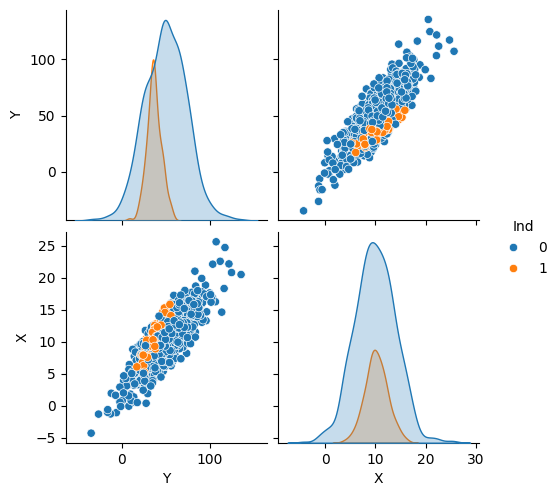

In [227]:
import seaborn as sns
sns.pairplot(df,hue="Ind")

<Axes: xlabel='Ind', ylabel='Y'>

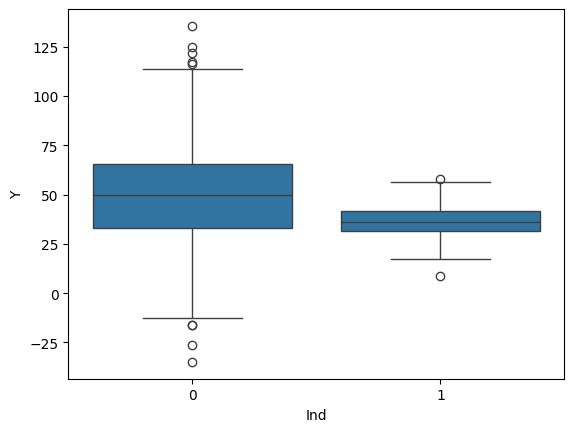

In [228]:
sns.boxplot(x='Ind',y='Y', data=df)

no se puede hacer un modelo de regresion y para esto se debe chequear el diagra de boxplot, si las cajas están desplazadas y de mismo tamaño, significa que no tienen interacción

con lo anteriro sepuede ver que las variables con la variable categorica ind si tienen ibntereacción, porende, se debe realizar un modelo con interacción de variable categórica

no olvidar argumentarcon las pendietnes 

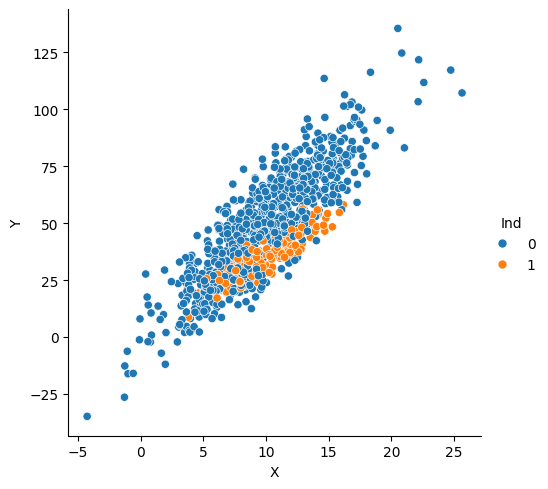

In [229]:
sns.relplot(x='X',y='Y', data=df, hue='Ind')

escribir las respuestas a las preguntas del punto

In [230]:
import statsmodels.api as sm

df['X_ind']= df['X']*df['Ind']
x=sm.add_constant(df.drop('Y',axis=1))
y=df['Y']

model=sm.OLS(y,x).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.34e-312
Time:                        16:22:29   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4991      1.001     -0.498      0.618      -2.464       1.466
X              5.0411      0.093     53.997      0.000       4.858       5.224
Ind            4.5491      3.674      1.238      0.216      -2.661      11.759
X_ind         -1.8466      0.353     -5.239      0.000      -2.538      -1.155
==============================================================================
Omnibus:                        4.301   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.811
Skew:                           0.065   Prob(JB):                       0.0902
Kurtosis:                       3.314   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
betas=list(model.params)
betas

[-0.4990969581235116,
 5.041128533994829,
 4.549081221693465,
 -1.8466400192028476]

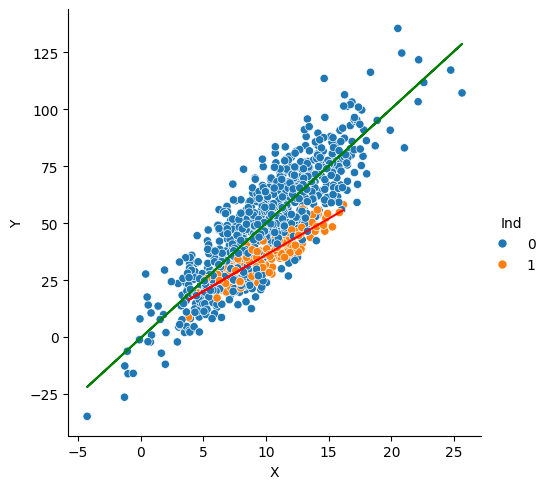

In [232]:
import matplotlib.pyplot as plt
df['y_pred']=betas[0]+betas[1]*df['X']+betas[2]*df['Ind']+betas[3]*df['X_ind']
sns.relplot(x='X',y='Y', data=df, hue='Ind')
datos_ind_0= df[df['Ind']==0]
datos_ind_1= df[df['Ind']==1]

plt.plot(datos_ind_0['X'],datos_ind_0['y_pred'], c="green")
plt.plot(datos_ind_1['X'],datos_ind_1['y_pred'], c="red")
plt.show()



El modelo representa bien los datos y muestra un cambio respecto a la variable categórica. Como lo muestran las lineas rojas y verdad

Ahora se corroboran los supuestos 

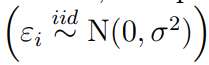

In [233]:
residuales=model.resid
#otra forma de calcular los residuales es:
residuales_v2= df["y_pred"]-df["Y"]

Prueba de normalidad

In [234]:
p_value=sm.stats.jarque_bera(residuales)[1]
#se toma la posición 2 porque el ínidice 0 tiene es el valor estadístico
p_value2=sm.stats.jarque_bera(residuales_v2)[1]
print(p_value,p_value2)

0.09020850574930685 0.09020850574930685


Como el valor p da mayor que 0.05, significa que cumple con el supuesto de normalidad

otra forma de observar la normalidad es observa el plot de la distribución normal

(array([ 14.,  35., 110., 198., 326., 181.,  88.,  37.,  10.,   1.]),
 array([-32.12624592, -24.8855315 , -17.64481707, -10.40410264,
         -3.16338822,   4.07732621,  11.31804064,  18.55875507,
         25.79946949,  33.04018392,  40.28089835]),
 <BarContainer object of 10 artists>)

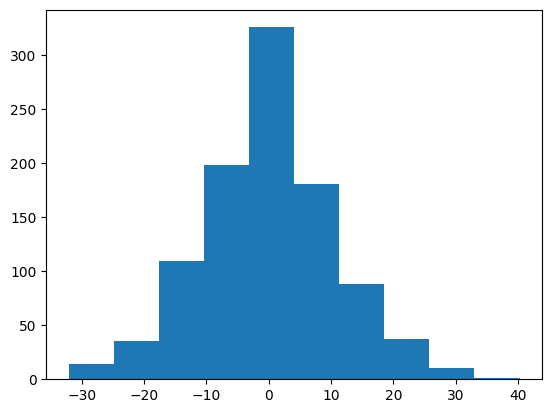

In [235]:
plt.hist(residuales)

In [236]:
#  prueba de independencia
from statsmodels.stats.stattools import durbin_watson
independencia=durbin_watson(residuales)
print(independencia)

1.984805425927445


Cómo la independencia está dentro del rango de 0 y 4, se valida el supuesto de independencia
1,5 y 2,5 hay independencia
por fuera de ese rango pero dentro de 4 y 0, hay dependencia, tanto negativa o positiva hablando de la pendiente

Ahora el supuesto de media 0

In [237]:
from scipy.stats import ttest_1samp
media_cero=ttest_1samp(residuales, 0)


print(" el valor p= ", media_cero[1], "es cercano a 1, entonces cumple el supuesto de media 0")

 el valor p=  0.9999999999999376 es cercano a 1, entonces cumple el supuesto de media 0


Homocedasticidad
o varianza cte

In [238]:
from statsmodels.stats.diagnostic import het_breuschpagan
homo=het_breuschpagan(residuales,model.model.exog)

print("valor p de lagrange ",homo[1],"")

valor p de lagrange  6.835236597867889e-18 


Este método evalua la heterocedasticidad. si p valor es menor a 0,05 ; los residuos son heterocedásticos; de lo contrario son homocedasticos

No se cumple la homocedasticidad


## Punto 2
<br/>

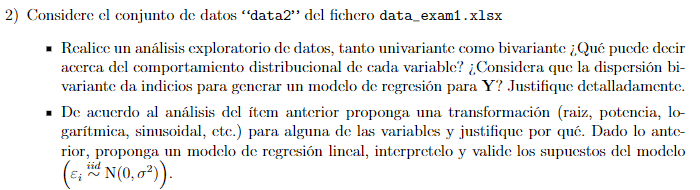

In [239]:
import pandas as pd
df_2=pd.read_excel("data_exam1.xlsx", sheet_name="data2")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [240]:
df_2.corr()

,Y,X
Y,1.000000,0.520376
X,0.520376,1.000000


In [241]:
df_2.corr(method="kendall")

,Y,X
Y,1.000000,0.580777
X,0.580777,1.000000


Con estos dos métodos veo y garantizo por dos métodos que los datos su están relacionados.

## Análisis univariante

<Axes: xlabel='X'>

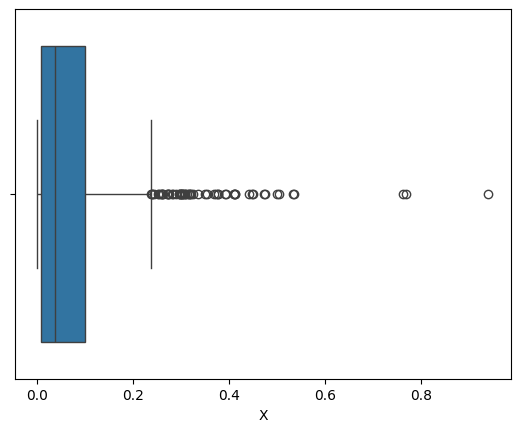

In [242]:
import seaborn as sns
sns.boxplot(x='X', data=df_2)

<Axes: xlabel='Y'>

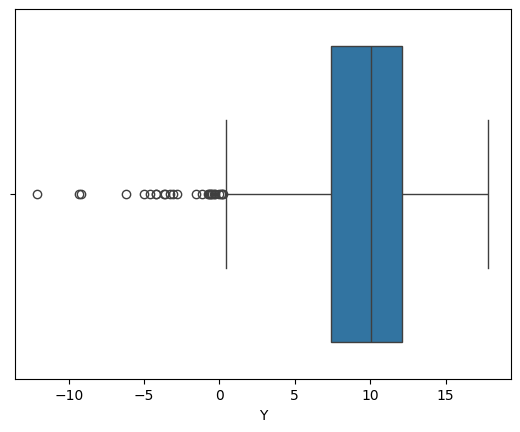

In [243]:
sns.boxplot(x='Y', data=df_2)

### Análisis exploratorio univariante

Luego de realizar las gráficas de cajas y bigotes se puede identificar que las variables tienen tanto X como Y tienen un sesgo hacia valores opuestos




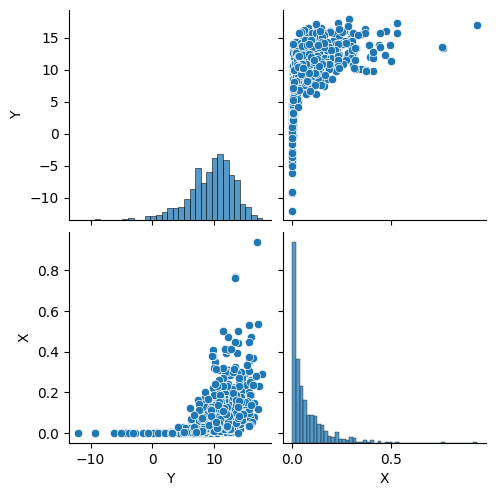

In [244]:
sns.pairplot(df_2)

EXPLICACIÓN FALTANTE

## TRANSFORMACIÓN DE VARIABLES O DE VALORES DE VARIABLES

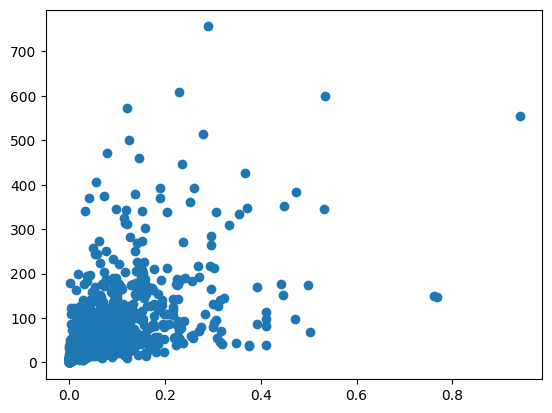

In [245]:
import numpy as np
#df_2['X_trans']= np.exp(df_2['X'])
df_2['Y_trans']= 1.45**(df_2['Y'])
plt.scatter(df_2['X'],df_2["Y_trans"])

El comportamiento de los datos dispersos muestra una tendencia logarítmica. Por ende, se multiplica para realizar una transformación exponencial

In [246]:
import statsmodels.api as sm

x=sm.add_constant(df_2.drop(['Y', "Y_trans"],axis=1))
y=df_2['Y_trans']

model=sm.OLS(y,x).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y_trans   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     444.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.94e-82
Time:                        16:22:32   Log-Likelihood:                -5703.6
No. Observations:                1000   AIC:                         1.141e+04
Df Residuals:                     998   BIC:                         1.142e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0380      2.861     11.898      0.000      28.424      39.652
X            497.0151     23.565     21.091      0.000     450.772     543.258
==============================================================================
Omnibus:                      599.839   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7638.048
Skew:                           2.527   Prob(JB):                         0.00
Kurtosis:                      15.561   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**evaluación de supuestos**

- Independencia: como el durbin watson = 2 y debería estar entre 1,5 y 2,5; cumple con el supuesto de independencia
- Normalidad: el valor p del jarquebera (JB) es menor que 0.05, NO cumple con el supuesto de normalidad
- media cero: ttest1samp cerca de 1= media 0
- homocedasticidad: brechpagan

# Punto 3
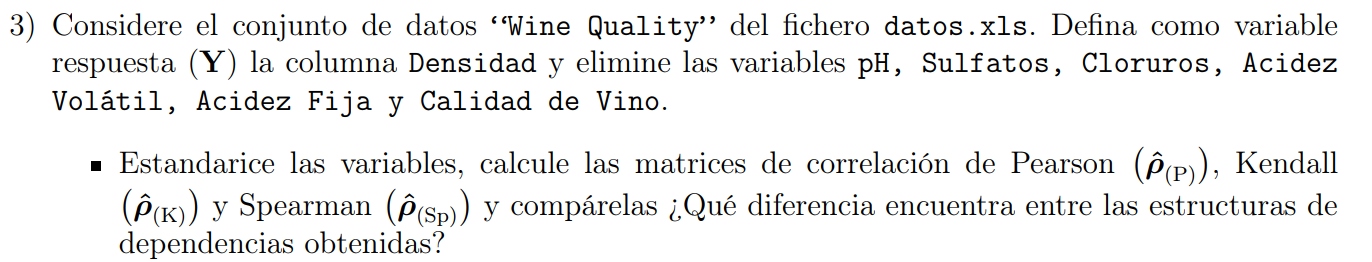

In [247]:
import pandas as pd
DFvino=pd.read_excel("datos.xls", sheet_name="Wine Quality", skiprows=2)
DFvino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calidad del Vino         4898 non-null   int64  
 1   Acidez Fija              4898 non-null   float64
 2   Acidez Volátil           4898 non-null   float64
 3   Ácido Cítrico            4898 non-null   float64
 4   Azúcar Residual          4898 non-null   float64
 5   Cloruros                 4898 non-null   float64
 6   Dióxido de Azúfre Libre  4898 non-null   float64
 7   Dióxido de Azúfre Total  4898 non-null   float64
 8   Densidad                 4898 non-null   float64
 9   pH                       4898 non-null   float64
 10  Sulfatos                 4898 non-null   float64
 11  Alcohol                  4898 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [248]:
DFvino = DFvino.drop(['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino'], axis=1)
densidad = DFvino["Densidad"]
DFvino = DFvino.drop(columns=["Densidad"])
DFvino.insert(0, "Densidad", densidad)
DFvino.head(5)

,Densidad,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
0,1.0010,0.36,20.7,45.0,170.0,8.8
1,0.9940,0.34,1.6,14.0,132.0,9.5
2,0.9951,0.40,6.9,30.0,97.0,10.1
3,0.9956,0.32,8.5,47.0,186.0,9.9
4,0.9956,0.32,8.5,47.0,186.0,9.9


In [249]:
# Verificar los nombres de las columnas
#print(DFvino.columns)

# Eliminar las columnas si existen
#columnas_a_eliminar = ['Densidad''pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino']
#columnas_existentes = [col for col in columnas_a_eliminar if col in DFvino.columns]
#DFvino = DFvino.drop(columnas_existentes, axis=1)

#densidad = DFvino["Densidad"]
#DFvino = DFvino.drop(columns=["Densidad"])
#DFvino.insert(0, "Densidad", densidad)

# Mostrar las primeras 5 filas del DataFrame resultante
#print(DFvino.head(5))


In [250]:
# Estandarización de variables -------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
DFvino_scaled = scaler.fit_transform(DFvino.iloc[:, 1:])
DFvino.iloc[:, 1:] = DFvino_scaled
DFvino.head()


,Densidad,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
0,1.0010,0.213280,2.821349,0.569932,0.744565,-1.393152
1,0.9940,0.048001,-0.944765,-1.253019,-0.149685,-0.824276
2,0.9951,0.543838,0.100282,-0.312141,-0.973336,-0.336667
3,0.9956,-0.117278,0.415768,0.687541,1.121091,-0.499203
4,0.9956,-0.117278,0.415768,0.687541,1.121091,-0.499203


In [251]:
# Matriz de correlación de Spearman
print("Matriz de correlación de Spearman:")
spearman_corr=DFvino.corr(method='spearman')
print(DFvino.corr(method='spearman'))
print("--------------------------------------------------------------------------------------")


Matriz de correlación de Spearman:
                         Densidad  Ácido Cítrico  Azúcar Residual  \
Densidad                 1.000000       0.091425         0.780365   
Ácido Cítrico            0.091425       1.000000         0.024621   
Azúcar Residual          0.780365       0.024621         1.000000   
Dióxido de Azúfre Libre  0.327822       0.088314         0.346107   
Dióxido de Azúfre Total  0.563824       0.093219         0.431252   
Alcohol                 -0.821855      -0.029170        -0.445257   

                         Dióxido de Azúfre Libre  Dióxido de Azúfre Total  \
Densidad                                0.327822                 0.563824   
Ácido Cítrico                           0.088314                 0.093219   
Azúcar Residual                         0.346107                 0.431252   
Dióxido de Azúfre Libre                 1.000000                 0.618616   
Dióxido de Azúfre Total                 0.618616                 1.000000   
Alcohol            

In [252]:
# Matriz de correlación de Kendall
print("\nMatriz de correlación de Kendall:")
kendall_corr=DFvino.corr(method='kendall')
print(DFvino.corr(method='kendall'))
print('************************************************************************************************')



Matriz de correlación de Kendall:
                         Densidad  Ácido Cítrico  Azúcar Residual  \
Densidad                 1.000000       0.061542         0.588989   
Ácido Cítrico            0.061542       1.000000         0.015329   
Azúcar Residual          0.588989       0.015329         1.000000   
Dióxido de Azúfre Libre  0.217295       0.060809         0.236748   
Dióxido de Azúfre Total  0.388378       0.062188         0.293319   
Alcohol                 -0.635104      -0.019981        -0.305601   

                         Dióxido de Azúfre Libre  Dióxido de Azúfre Total  \
Densidad                                0.217295                 0.388378   
Ácido Cítrico                           0.060809                 0.062188   
Azúcar Residual                         0.236748                 0.293319   
Dióxido de Azúfre Libre                 1.000000                 0.444696   
Dióxido de Azúfre Total                 0.444696                 1.000000   
Alcohol            

In [253]:
# Matriz de correlación de Pearson
print("\nMatriz de correlación de Pearson:")
pearson_corr=DFvino.corr(method='pearson')
print(DFvino.corr(method='pearson'))
print("")


Matriz de correlación de Pearson:
                         Densidad  Ácido Cítrico  Azúcar Residual  \
Densidad                 1.000000       0.149503         0.838966   
Ácido Cítrico            0.149503       1.000000         0.094212   
Azúcar Residual          0.838966       0.094212         1.000000   
Dióxido de Azúfre Libre  0.294210       0.094077         0.299098   
Dióxido de Azúfre Total  0.529881       0.121131         0.401439   
Alcohol                 -0.780138      -0.075729        -0.450631   

                         Dióxido de Azúfre Libre  Dióxido de Azúfre Total  \
Densidad                                0.294210                 0.529881   
Ácido Cítrico                           0.094077                 0.121131   
Azúcar Residual                         0.299098                 0.401439   
Dióxido de Azúfre Libre                 1.000000                 0.615501   
Dióxido de Azúfre Total                 0.615501                 1.000000   
Alcohol            

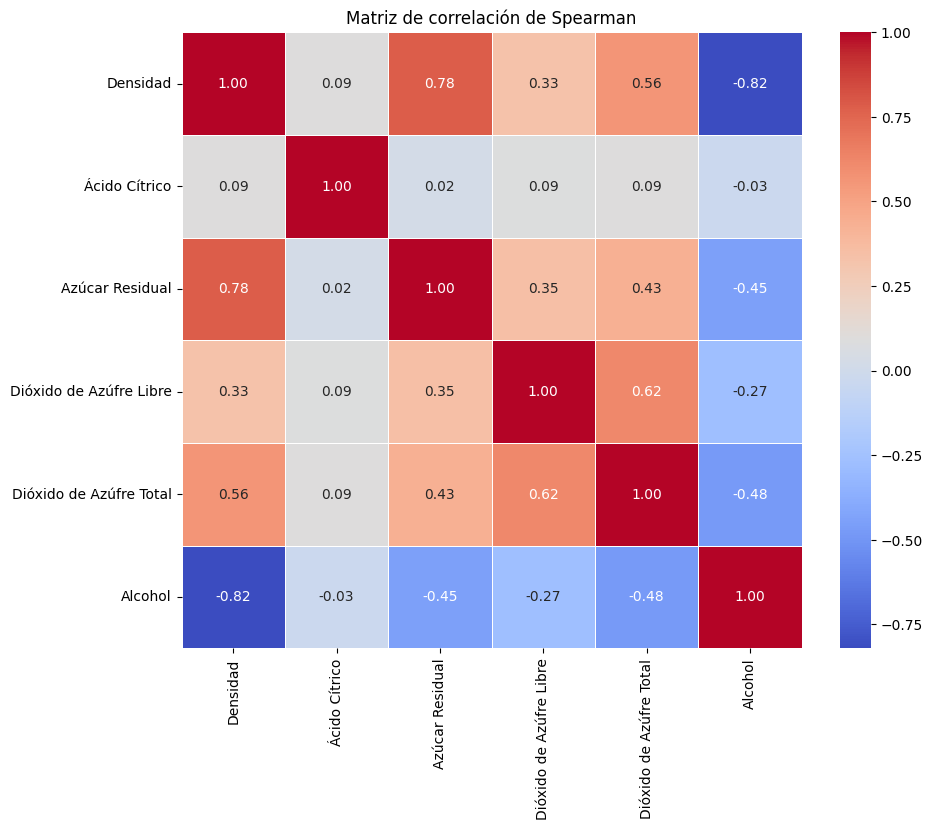

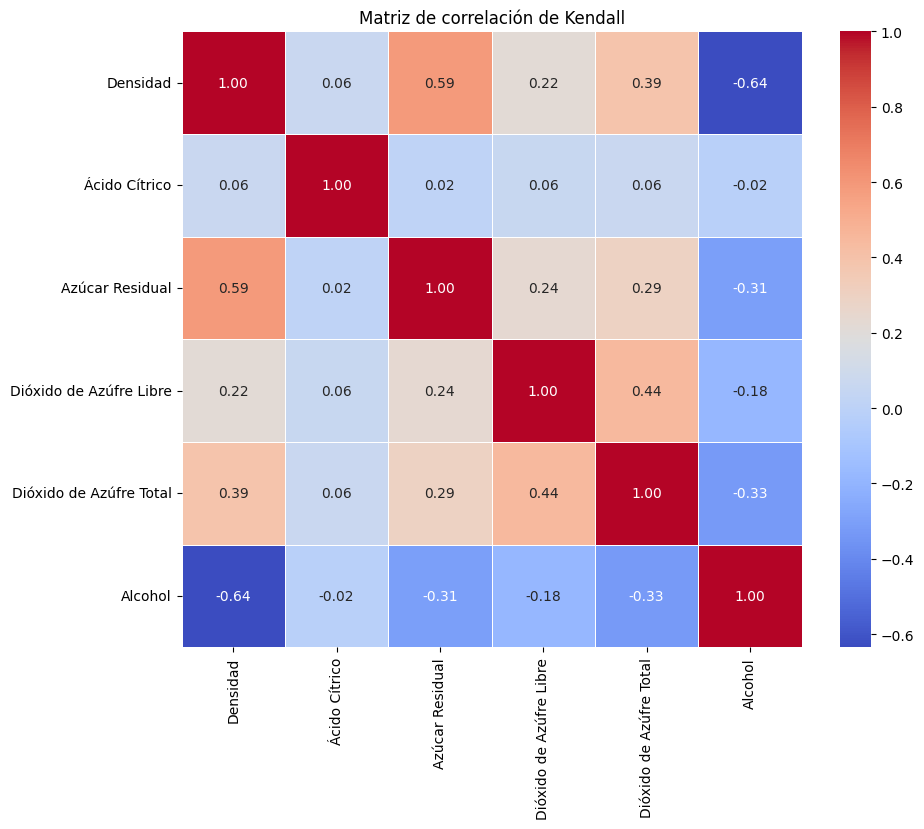

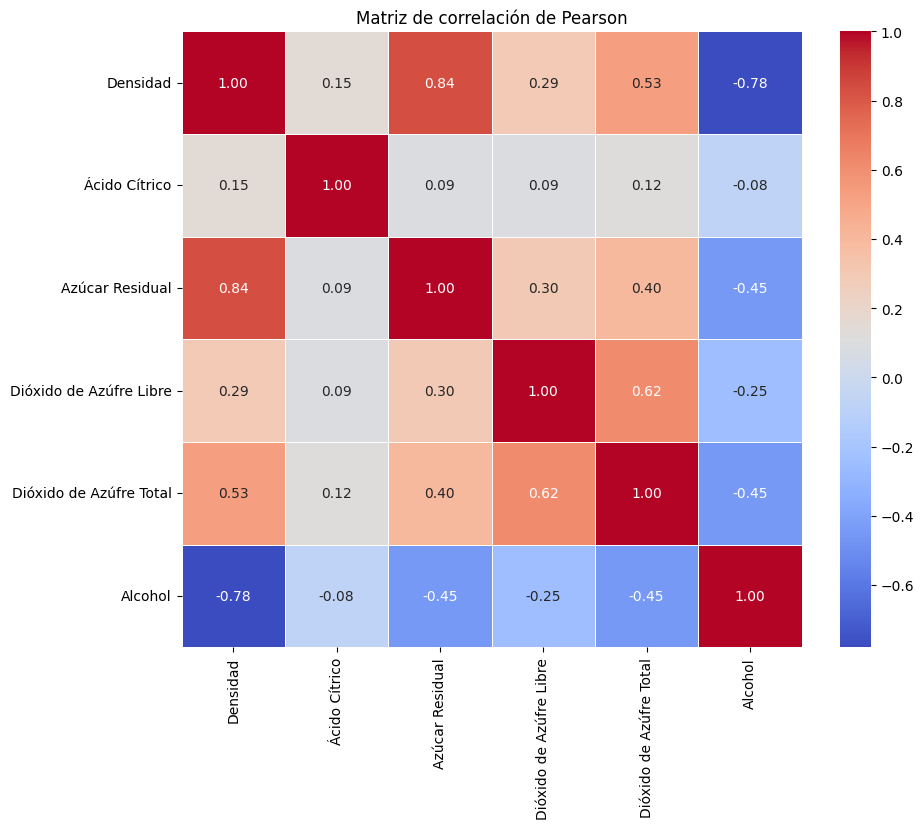

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor para la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de correlación de Spearman")
plt.show()

# Mapa de calor para la matriz de correlación de Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de correlación de Kendall")
plt.show()

# Mapa de calor para la matriz de correlación de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de correlación de Pearson")
plt.show()


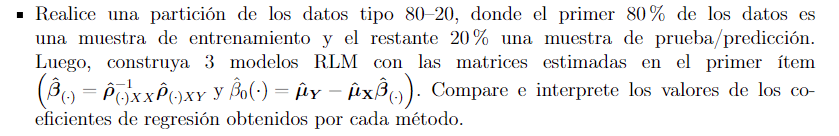

In [255]:
DFvino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Densidad                 4898 non-null   float64
 1   Ácido Cítrico            4898 non-null   float64
 2   Azúcar Residual          4898 non-null   float64
 3   Dióxido de Azúfre Libre  4898 non-null   float64
 4   Dióxido de Azúfre Total  4898 non-null   float64
 5   Alcohol                  4898 non-null   float64
dtypes: float64(6)
memory usage: 229.7 KB


In [256]:
pearson_corr_y = DFvino.corrwith(DFvino['Densidad'], method='pearson')
kendall_corr_y = DFvino.corrwith(DFvino['Densidad'], method='kendall')
spearman_corr_y = DFvino.corrwith(DFvino['Densidad'], method='spearman')
print("Correlación de la densidad (y) con sus descriptores", "\n ------------------------------------------", "\n PEARSON")
print(pearson_corr_y)
print("\n ---------------------------------------", "\n KENDALL")
print(kendall_corr_y)
print("\n ---------------------------------------", "\n SPEARMAN")
print(spearman_corr_y)
print("\n ---------------------------------------")

Correlación de la densidad (y) con sus descriptores 
 ------------------------------------------ 
 PEARSON
Densidad                   1.000000
Ácido Cítrico              0.149503
Azúcar Residual            0.838966
Dióxido de Azúfre Libre    0.294210
Dióxido de Azúfre Total    0.529881
Alcohol                   -0.780138
dtype: float64

 --------------------------------------- 
 KENDALL
Densidad                   1.000000
Ácido Cítrico              0.061542
Azúcar Residual            0.588989
Dióxido de Azúfre Libre    0.217295
Dióxido de Azúfre Total    0.388378
Alcohol                   -0.635104
dtype: float64

 --------------------------------------- 
 SPEARMAN
Densidad                   1.000000
Ácido Cítrico              0.091425
Azúcar Residual            0.780365
Dióxido de Azúfre Libre    0.327822
Dióxido de Azúfre Total    0.563824
Alcohol                   -0.821855
dtype: float64

 ---------------------------------------


In [257]:
from sklearn.model_selection import train_test_split
X=DFvino.drop(["Densidad"], axis = 1)
Y=DFvino["Densidad"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [271]:
import numpy as np

# Calcular la inversa de la matriz de correlación de las características
rho_X_inv = np.linalg.inv(pearson_corr)  # Usando la matriz de correlación de Pearson, puedes cambiarla por las otras matrices

# Calcular los coeficientes de regresión
beta = np.dot(rho_X_inv, pearson_corr_y)  # Usando la matriz de correlación de Pearson, puedes cambiarla por las otras matrices

# Calcular la media de la variable dependiente
mu_Y = np.mean(y_train)

# Calcular la media de las características
mu_X = np.mean(X_train, axis=0)
print(mu_X)
print(beta)
# Calcular el término de intersección (beta_0)
#beta_0 = mu_Y - np.dot(mu_X, beta)

# Imprimir los coeficientes de regresión
#print("Coeficientes de regresión:")
#print("Beta:", beta)
#print("Beta_0:", beta_0)

Ácido Cítrico             -0.012070
Azúcar Residual            0.011690
Dióxido de Azúfre Libre   -0.012556
Dióxido de Azúfre Total   -0.008460
Alcohol                   -0.004410
dtype: float64
[ 1.00000000e+00 -4.35762537e-15  1.15463195e-14  1.44328993e-14
 -1.68753900e-14  2.62012634e-14]


ValueError: shapes (5,) and (6,) not aligned: 5 (dim 0) != 6 (dim 0)